Midterm

In [45]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
#read csv file from online github 
df2 = 'https://raw.githubusercontent.com/leningschulich/schulich_data_science/main/midterm_data.csv'
df = pd.read_csv(df2)
df

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
0,1,62,3,13.295129,2,20,199.21,0,Desktop,Location 1
1,2,65,2,21.686405,3,21,294.82,0,Desktop,Location 3
2,3,18,7,17.135220,4,23,240.87,0,Desktop,Location 4
3,4,21,9,29.589311,8,16,183.78,1,Desktop,Location 2
4,5,21,3,25.948584,4,10,59.51,1,Tablet,Location 4
...,...,...,...,...,...,...,...,...,...,...
4995,4996,48,8,45.000000,11,25,278.92,0,Tablet,Location 5
4996,4997,31,4,44.700747,9,12,78.97,0,Tablet,Location 2
4997,4998,34,5,27.146624,7,19,139.42,1,Desktop,Location 4
4998,4999,58,1,45.000000,11,24,203.42,0,Desktop,Location 5


In [3]:
df.info() # understanding our DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           5000 non-null   int64  
 1   age              5000 non-null   int64  
 2   sessions         5000 non-null   int64  
 3   time_spent       5000 non-null   float64
 4   pages_visited    5000 non-null   int64  
 5   cart_items       5000 non-null   int64  
 6   cart_value       5000 non-null   float64
 7   checkout_status  5000 non-null   int64  
 8   device           4900 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 390.8+ KB


In [6]:
df.describe(include = 'all')


,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,4900,4970
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3,5
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Desktop,Location 4
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2538,1056
mean,2500.500000,41.538200,5.027200,25.158496,5.774400,14.966400,149.443146,0.272400,NaN,NaN
std,1443.520003,14.042734,2.594958,9.825536,2.570842,6.046336,68.711683,0.445239,NaN,NaN
min,1.000000,18.000000,1.000000,1.000000,1.000000,5.000000,20.410000,0.000000,NaN,NaN
25%,1250.750000,29.000000,3.000000,18.268862,4.000000,10.000000,92.482500,0.000000,NaN,NaN
50%,2500.500000,42.000000,5.000000,25.035361,6.000000,15.000000,143.440000,0.000000,NaN,NaN
75%,3750.250000,54.000000,7.000000,32.000361,8.000000,20.000000,198.380000,1.000000,NaN,NaN


we can see there are 3 types of devices and 5 unique locations. The location that people visit the website most often is location4, which includes 1056 people. Desktop is the most often used device in this dataset. 2538 people are using it. 

Data cleaning and preparation:

Based on the information provided above, we can find that device has missing values of 100, and location has 30 missing values. 

In [7]:
df[df['device'].isnull() & df['location'].isnull()]

,userID,age,sessions,time_spent,pages_visited,cart_items,cart_value,checkout_status,device,location
2130,2131,20,5,21.841304,6,19,243.39,0,NaN,NaN


There is one row that both device and location data are missing, thus we delete this row.

In [8]:
df.drop([2130], axis=0, inplace=True)

Then, we drop rows with location is null, since 29 rows only accounts for 5% of entire data.

In [11]:
df.drop(df[df['location'].isnull()].index,axis =0,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4970 non-null   int64  
 1   age              4970 non-null   int64  
 2   sessions         4970 non-null   int64  
 3   time_spent       4970 non-null   float64
 4   pages_visited    4970 non-null   int64  
 5   cart_items       4970 non-null   int64  
 6   cart_value       4970 non-null   float64
 7   checkout_status  4970 non-null   int64  
 8   device           4871 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 427.1+ KB


We can see that device still have about 100 missing values.

Since desktop is the most common device, we now try to fill in the null value with desktop, and others, respectively to see if there is any changes.

In [13]:
df_test = df.copy()
df_test.groupby('device').describe()

userID                                                           \
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2522.0  2484.090801  1436.080284  1.0  1261.25  2499.5  3736.75   
Mobile   1417.0  2516.292167  1457.973685  7.0  1236.00  2508.0  3807.00   
Tablet    932.0  2535.273605  1453.698885  5.0  1265.25  2516.5  3757.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2522.0  41.308882  ...   197.2450  427.40          2522.0   
Mobile   4991.0  1417.0  41.706422  ...   201.7600  387.98          1417.0   
Tablet   5000.0   932.0  41.875536  ...   197.8775  377.98           932.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285488  0.451736  0.0  0.0  0.0  1.0  1.0  
Mobile   0.263938  0.440922  0.0  0.0  0.0  1.0  1.0  
Tablet   0.255365  0.436300  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

In [16]:
df_test['device'] = df_test['device'].fillna('Other')
df_test.groupby('device').describe()

userID                                                            \
          count         mean          std   min      25%     50%      75%   
device                                                                      
Desktop  2522.0  2484.090801  1436.080284   1.0  1261.25  2499.5  3736.75   
Mobile   1417.0  2516.292167  1457.973685   7.0  1236.00  2508.0  3807.00   
Other      99.0  2411.656566  1386.399927  80.0  1226.00  2379.0  3541.50   
Tablet    932.0  2535.273605  1453.698885   5.0  1265.25  2516.5  3757.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2522.0  41.308882  ...   197.2450  427.40          2522.0   
Mobile   4991.0  1417.0  41.706422  ...   201.7600  387.98          1417.0   
Other    4988.0    99.0  41.282828  ...   191.7000  302.48            99.0   
Tablet   5000.0   932.0  41.875536  ...   197.8775  377.98           932.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.285488  0.451736  0.0  0.0  0.0  1.0  1.0  
Mobile   0.263938  0.440922  0.0  0.0  0.0  1.0  1.0  
Other    0.222222  0.417855  0.0  0.0  0.0  0.0  1.0  
Tablet   0.255365  0.436300  0.0  0.0  0.0  1.0  1.0  

[4 rows x 64 columns]

In [17]:
df_test_2 = df.copy()
df_test_2['device'] = df_test_2['device'].fillna('Desktop')
df_test_2.groupby('device').describe()

userID                                                           \
          count         mean          std  min      25%     50%      75%   
device                                                                     
Desktop  2621.0  2481.354826  1434.045070  1.0  1260.00  2497.0  3723.00   
Mobile   1417.0  2516.292167  1457.973685  7.0  1236.00  2508.0  3807.00   
Tablet    932.0  2535.273605  1453.698885  5.0  1265.25  2516.5  3757.25   

                    age             ... cart_value         checkout_status  \
            max   count       mean  ...        75%     max           count   
device                              ...                                      
Desktop  4999.0  2621.0  41.307898  ...   196.9500  427.40          2621.0   
Mobile   4991.0  1417.0  41.706422  ...   201.7600  387.98          1417.0   
Tablet   5000.0   932.0  41.875536  ...   197.8775  377.98           932.0   

                                                      
             mean       std  min  25%  50%  75%  max  
device                                                
Desktop  0.283098  0.450590  0.0  0.0  0.0  1.0  1.0  
Mobile   0.263938  0.440922  0.0  0.0  0.0  1.0  1.0  
Tablet   0.255365  0.436300  0.0  0.0  0.0  1.0  1.0  

[3 rows x 64 columns]

We can find big changes exist in std column when I use 'Others', and only slightly changes of data when I use 'Desktop'. 
Thus, we can adjust all the null values in device column to fill in the value 'Desktop'

In [18]:
df['device'] = df['device'].fillna('Desktop')

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4970 non-null   int64  
 1   age              4970 non-null   int64  
 2   sessions         4970 non-null   int64  
 3   time_spent       4970 non-null   float64
 4   pages_visited    4970 non-null   int64  
 5   cart_items       4970 non-null   int64  
 6   cart_value       4970 non-null   float64
 7   checkout_status  4970 non-null   int64  
 8   device           4970 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 427.1+ KB


Now we don't have any missing values, lets look at the duplicates.

In [20]:
df.drop_duplicates(inplace=True) #We need to drop rows with all values are the same
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4970 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   userID           4970 non-null   int64  
 1   age              4970 non-null   int64  
 2   sessions         4970 non-null   int64  
 3   time_spent       4970 non-null   float64
 4   pages_visited    4970 non-null   int64  
 5   cart_items       4970 non-null   int64  
 6   cart_value       4970 non-null   float64
 7   checkout_status  4970 non-null   int64  
 8   device           4970 non-null   object 
 9   location         4970 non-null   object 
dtypes: float64(2), int64(6), object(2)
memory usage: 427.1+ KB


We can find that there is no duplicate in our dataset. Now, let's see if there is outliers in this dataset.

<AxesSubplot:ylabel='cart_value'>

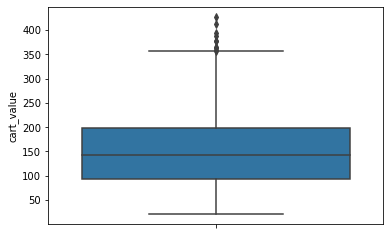

In [29]:
sns.boxplot(data = df, y='cart_value')

<AxesSubplot:xlabel='cart_value', ylabel='Count'>

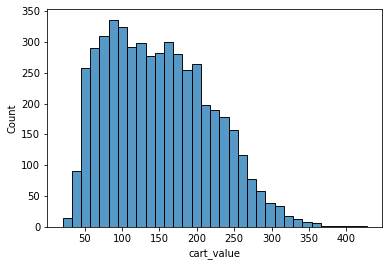

In [30]:
sns.histplot(df['cart_value'])

In [31]:
# check how many carts have value larger than 350 and delete them
df.drop(df[(df['cart_value']>350)].index,axis =0,
        inplace=True)

<AxesSubplot:ylabel='pages_visited'>

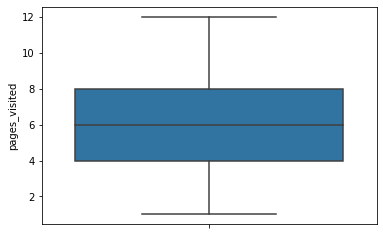

In [33]:
sns.boxplot(data = df, y='pages_visited')

<AxesSubplot:ylabel='cart_items'>

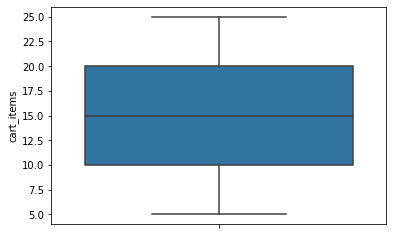

In [34]:
sns.boxplot(data = df, y='cart_items')

<AxesSubplot:ylabel='sessions'>

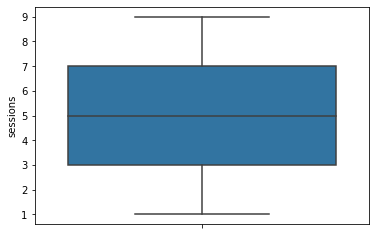

In [35]:
sns.boxplot(data = df, y='sessions')

<AxesSubplot:ylabel='age'>

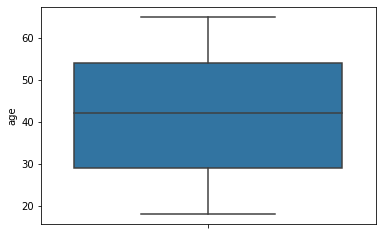

In [36]:
sns.boxplot(data = df, y='age')

Now, we finish the data cleaning.

Then, we can start to analyze the behaviour or characteristics of users who complete check out vs those who do not

In [28]:
df2 = df.groupby('checkout_status')
df2.describe()

age                                                      \
                  count       mean        std   min   25%   50%   75%   max   
checkout_status                                                               
0                3616.0  41.620575  13.974146  18.0  29.0  42.0  54.0  65.0   
1                1354.0  41.280650  14.235932  18.0  28.0  41.0  54.0  65.0   

                sessions            ... cart_items       cart_value  \
                   count      mean  ...        75%   max      count   
checkout_status                     ...                               
0                 3616.0  5.054480  ...       22.0  25.0     3616.0   
1                 1354.0  4.940916  ...       17.0  20.0     1354.0   

                                                                            \
                       mean        std    min       25%      50%       75%   
checkout_status                                                              
0                152.661009  74.949552  20.41   85.5675  147.025  209.6775   
1                140.725886  47.669413  43.22  103.1175  136.180  174.3750   

                         
                    max  
checkout_status          
0                427.40  
1                313.76  

[2 rows x 48 columns]

In [47]:
distinct_values_Location = df['location'].unique()
distinct_values_Devicen = df['device'].unique()
print(distinct_values_Location)
print(distinct_values_Devicen)

['Location 1' 'Location 3' 'Location 4' 'Location 2' 'Location 5']
['Desktop' 'Tablet' 'Mobile']


In [46]:
# checking device
loc_1 = df[df['device'] == 'Desktop']['checkout_status']
loc_2 = df[df['device'] == 'Tablet']['checkout_status']
loc_3 = df[df['device'] == 'Mobile']['checkout_status']

p_val = stats.f_oneway(loc_1, loc_2, loc_3)
print(p_val)

F_onewayResult(statistic=1.6678423927083872, pvalue=0.1887596010099493)


In [49]:
# checking location
loc_1 = df[df['location'] == 'Location 1']['checkout_status']
loc_2 = df[df['location'] == 'Location 2']['checkout_status']
loc_3 = df[df['location'] == 'Location 3']['checkout_status']
loc_4 = df[df['location'] == 'Location 4']['checkout_status']
loc_5 = df[df['location'] == 'Location 5']['checkout_status']
p_val = stats.f_oneway(loc_1, loc_2, loc_3,loc_4,loc_5)
print(p_val)

F_onewayResult(statistic=0.5525899446720297, pvalue=0.6971416657490153)


We can see the p-value is above 0.05, To be safe though, perhaps we won't do an experiment which seeks to influence location and device.

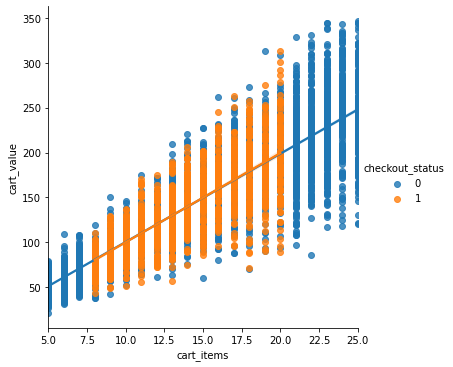

In [41]:
sns.lmplot(data = df, x='cart_items', y='cart_value', hue = 'checkout_status')

We are comparing the cart_items versus the cart_values via checkout_status. It's clearly that people who purchase has are located in the middle while people do not purchase has more extreme values regards with people who purchase. 

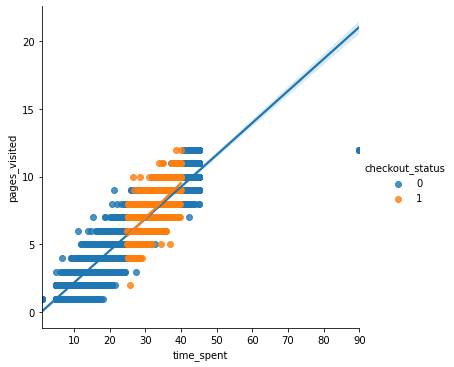

In [42]:
sns.lmplot(data = df, x='time_spent', y='pages_visited', hue = 'checkout_status')

We are comparing the time_spent versus the pages_visited via checkout_status. It's clearly that people who purchase has are located in the middle while people do not purchase has more extreme values regards with people who purchase. 

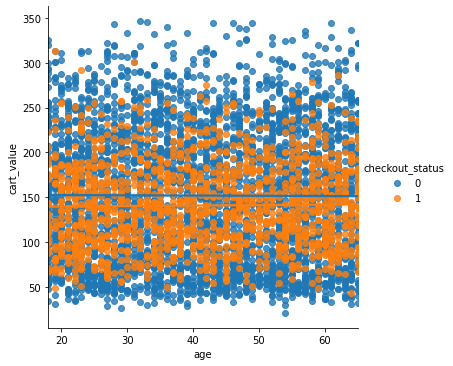

In [51]:
sns.lmplot(data = df, x='age', y='cart_value', hue = 'checkout_status')

We are comparing the age versus the cart_values via checkout_status. It seems like there are no too much difference when it comes to age. 

Let's do an independent t-test next for variant(checkout_status = 0) compared to the control(checkout_status = 1).

In [52]:
# Compare time_spent

var1 = df[df['checkout_status']== 0]['time_spent']
control = df[df['checkout_status']== 1]['time_spent']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-29.264506215161198, pvalue=8.61546668034533e-174)


In [54]:
# Compare age

var1 = df[df['checkout_status']== 0]['age']
control = df[df['checkout_status']== 1]['age']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=0.8115142814908705, pvalue=0.4171093825448582)


In [55]:
# Compare sessions

var1 = df[df['checkout_status']== 0]['sessions']
control = df[df['checkout_status']== 1]['sessions']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=1.3678809842427289, pvalue=0.17141137616165947)


In [56]:
# Compare pages_visited

var1 = df[df['checkout_status']== 0]['pages_visited']
control = df[df['checkout_status']== 1]['pages_visited']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=-27.2191456693838, pvalue=3.6905114237261087e-152)


In [57]:
# Compare cart_items

var1 = df[df['checkout_status']== 0]['cart_items']
control = df[df['checkout_status']== 1]['cart_items']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=5.907213475793063, pvalue=3.7117308820185723e-09)


In [58]:
# Compare cart_value

var1 = df[df['checkout_status']== 0]['cart_value']
control = df[df['checkout_status']== 1]['cart_value']

p_val = stats.ttest_ind(var1, control)
print(p_val)

Ttest_indResult(statistic=5.133591627635794, pvalue=2.9513833678750276e-07)


When comparing cart_value, items, pages visited and time_spent, we see there are significant differences between variant and the control. Now we check which data works better:

In [53]:
df.groupby('checkout_status')[['time_spent']].mean()

,time_spent
checkout_status,
0,22.854895
1,31.327974


In [59]:
df.groupby('checkout_status')[['cart_value']].mean()

,cart_value
checkout_status,
0,151.799336
1,140.725886


In [60]:
df.groupby('checkout_status')[['cart_items']].mean()

,cart_items
checkout_status,
0,15.249028
1,14.115214


In [62]:
df.groupby('checkout_status')[['pages_visited']].mean()

,pages_visited
checkout_status,
0,5.207662
1,7.289513


We can observe that individuals who completed the checkout process tend to spend a longer duration on the website, have a lower cart value, fewer items in their cart, and visit more pages compared to those who do not complete the checkout.

We then look at what age group is more likely to check-out and put items in the cart.

<AxesSubplot:xlabel='age'>

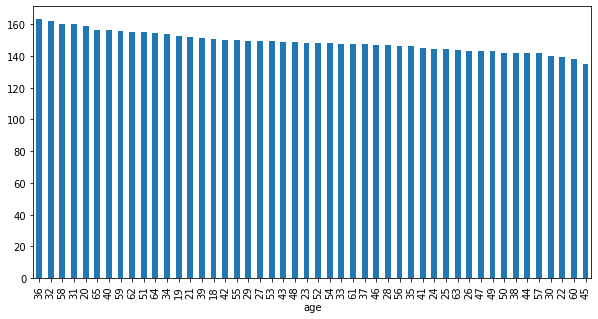

In [72]:
df.groupby('age')['cart_value'].mean().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

<AxesSubplot:xlabel='age'>

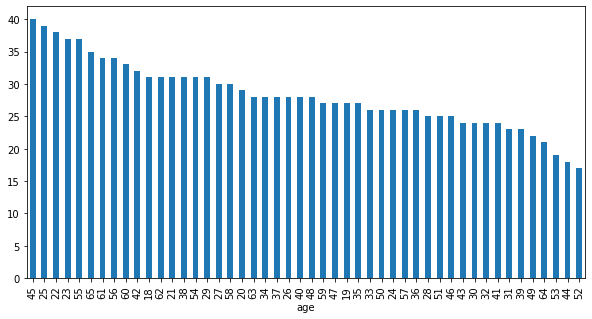

In [70]:
df.groupby('age')['checkout_status'].sum().sort_values(ascending=False).plot(kind='bar', figsize=(10, 5))

Based on the data analysis, we can observe the following patterns:
The age groups 45, 22-25, 55, and 65 show a higher likelihood of checking out on the website. The age group around 35 tends to have the highest number of items in the cart but does not complete the purchase.

Finally, I can conclude below recommodation.

Increase Time Spent: Encourage visitors to spend more time on the website by providing engaging content, personalized recommendations, and interactive features. In this way,  people will spend more time in the website, thus more liekly to purchase items. 

Set Cart Limits: Implement a cart limit to create sense of urgency and encourage customers to check out. When people reach the cart limit, they will more likely to check out in order to put new products into the cart.

Increase Cart Values: Focus on optimizing the cart values of age groups 45, 55, 22-25, and 65, as they show a higher likelihood of purchasing products. 

Address Cart Abandonment: we can focus on the age group around 35 to check what's their fav products and why they are not buying it. Analyzing the reasons why customers age aound this group are not completing their purchases. 

Promote Related Products: to attract people visit more pages, we can show related and recommended products below the cart page to attract customers further do the visiting in the website.




